In [80]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
# load the log from get_head
log_ = pd.read_csv('log_get_head.csv',sep=';') # load the ;-separated log 

In [82]:
# inspect data
log_

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,0,urls_get,requests,1.598367e+09,-0.131505,https://ekstrabladet.dk/flash/filmogtv/helt-ny...,https://ekstrabladet.dk/flash/filmogtv/helt-ny...,565319,200.0,True,NaN
1,1,urls_get,requests,1.598367e+09,-0.086136,https://ekstrabladet.dk/nyheder/erhvervsnyhede...,https://ekstrabladet.dk/nyheder/erhvervsnyhede...,566018,200.0,True,NaN
2,2,urls_get,requests,1.598367e+09,-0.056548,https://ekstrabladet.dk/sport/fodbold/landshol...,https://ekstrabladet.dk/sport/fodbold/landshol...,573745,200.0,True,NaN
3,3,urls_get,requests,1.598367e+09,-0.059775,https://ekstrabladet.dk/nyheder/samfund/corona...,https://ekstrabladet.dk/nyheder/samfund/corona...,566336,200.0,True,NaN
4,4,urls_get,requests,1.598367e+09,-0.050224,https://ekstrabladet.dk/ferie/tokyo-faar-genne...,https://ekstrabladet.dk/ferie/tokyo-faar-genne...,565156,200.0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37233,7,urls_get,requests,1.598472e+09,-1.669877,https://ekstrabladet.dk/flash/udlandkendte/kar...,https://ekstrabladet.dk/flash/udlandkendte/kar...,613908,200.0,True,NaN
37234,8,urls_get,requests,1.598472e+09,-0.054515,https://ekstrabladet.dk/sport/fodbold/udenland...,https://ekstrabladet.dk/sport/fodbold/udenland...,615026,200.0,True,NaN
37235,9,urls_get,requests,1.598472e+09,-0.070017,https://ekstrabladet.dk/biler/har-reddet-milli...,https://ekstrabladet.dk/biler/har-reddet-milli...,583687,200.0,True,NaN
37236,10,urls_get,requests,1.598472e+09,-0.260146,https://ekstrabladet.dk/112/politiet-stopper-m...,https://ekstrabladet.dk/112/politiet-stopper-m...,577612,200.0,True,NaN


In [83]:
log_['dt'] = pd.to_datetime(log_.t,unit='s')
dt = log_.dt.values[0]

In [84]:
log_['dt']

0       2020-08-25 14:57:17.458237410
1       2020-08-25 14:57:20.755363464
2       2020-08-25 14:57:22.844381094
3       2020-08-25 14:57:24.414458513
4       2020-08-25 14:57:25.978848219
                     ...             
37233   2020-08-26 20:02:56.990976095
37234   2020-08-26 20:03:00.631428719
37235   2020-08-26 20:03:02.760854959
37236   2020-08-26 20:03:04.680849314
37237   2020-08-26 20:03:06.580551624
Name: dt, Length: 37238, dtype: datetime64[ns]

Text(0.5, 0, 'Scraping progress')

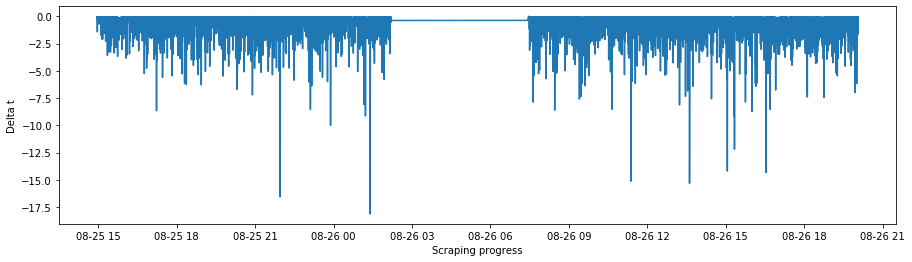

In [85]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_.dt,log_.delta_t) #.rolling(time=7).mean()
#log_['t'].rolling(window=7).mean().plot()
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

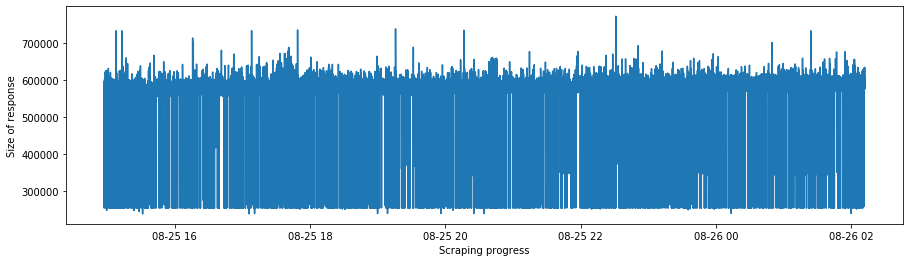

In [71]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_.dt,log_.response_size)

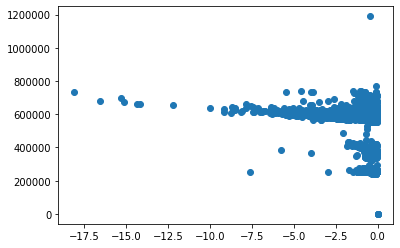

In [64]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_.delta_t,log_.response_size)

In [65]:
## Investigate errors
log_.success.value_counts() ## Count errors
## Groupby time
# round the time for aggregation
log_['dt_minute'] = log_.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_['dt_hour'] = log_.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
log_.groupby('dt_hour').success.mean()


dt_hour
2020-08-25 14:00:00.000000029    1.0
2020-08-25 14:00:00.000000030    1.0
2020-08-25 14:00:00.000000050    1.0
2020-08-25 14:00:00.000000063    1.0
2020-08-25 14:00:00.000000094    1.0
                                ... 
2020-08-26 20:00:00.000000959    1.0
2020-08-26 20:00:00.000000961    1.0
2020-08-26 20:00:00.000000978    1.0
2020-08-26 20:00:00.000000982    1.0
2020-08-26 20:00:00.000000994    1.0
Name: success, Length: 18577, dtype: float64